In [5]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
dir <- "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/comp_trees"
load(file.path(dir, "dfScaledLFC.RData"))
dfScaledLFC <- cbind(dfScaledLFC, Dataset = "BrSimNorm")
dfAllLFC <- dfScaledLFC

dir <- "environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100/tree_analysis"
load(file.path(dir, "dfScaledLFC.RData"))
dfScaledLFC <- cbind(dfScaledLFC, Dataset = "ChimpBrain")
dfAllLFC <- rbind(dfAllLFC, dfScaledLFC)

In [6]:
dfAllLFC

Type,Value,nCuts,Dataset
<chr>,<dbl>,<int>,<chr>
ConsInd,963525.8,40796,BrSimNorm
Cons,1082263.7,32339,BrSimNorm
Mean,1086449.7,32607,BrSimNorm
AC,901094.1,85499,BrSimNorm
ConsRedInd,248532.3,122637,BrSimNorm
Term,189945.4,131323,BrSimNorm
Txp,167140.5,139535,BrSimNorm
ConsInd,535524.4,19419,ChimpBrain
Cons,549330.8,18343,ChimpBrain


In [7]:
colValues <- c("Cons" = "#F8766D",
               "Mean" = "#C49A00",
                "ConsFilt" = "#53B400",
                "ConsFiltES" = "#00C094",
                "AC" = "#00B6EB",
                "Term" = "#A58AFF",
                "Txp" = "#FB61D7"
              )
ord <- c("Cons", "Mean", "ConsFilt", "ConsFiltES", "AC", "Term", "Txp")

In [13]:
size <- 20
dfAllLFC$Type[dfAllLFC$Type=="Txps"] = "Txp"
dfAllLFC$Type[dfAllLFC$Type=="ConsInd"] = "ConsFilt"
dfAllLFC$Type[dfAllLFC$Type=="ConsRedInd"] = "ConsFiltES"
dfAllLFC$TypeUp <- factor(dfAllLFC$Type, levels = ord)

pLFC <- ggplot(dfAllLFC, aes(x=Dataset, fill = TypeUp, colour = TypeUp, y = Value)) + 
    geom_bar(stat="identity", position = "dodge", alpha=0.7) +
    theme_bw() +
    labs(fill="TypeUp", color="TypeUp") +
    xlab("Dataset") +
    ylab("Optimum Value") +
    scale_y_continuous(trans='log10') +
    coord_cartesian(ylim = c(1e5, 2*1e6)) +
    guides(fill=guide_legend(title="Type"), color=guide_legend(title="Type")) +
    theme(axis.title = element_text(size = size),
    plot.title = element_text(size = size + 1, hjust=0.5),
    axis.text = element_text(size = size),
    legend.text = element_text(size = size),
    legend.title = element_text(size = size)) +
    scale_color_manual(values = colValues) +
    scale_fill_manual(values = colValues) +
    theme(legend.position='top')

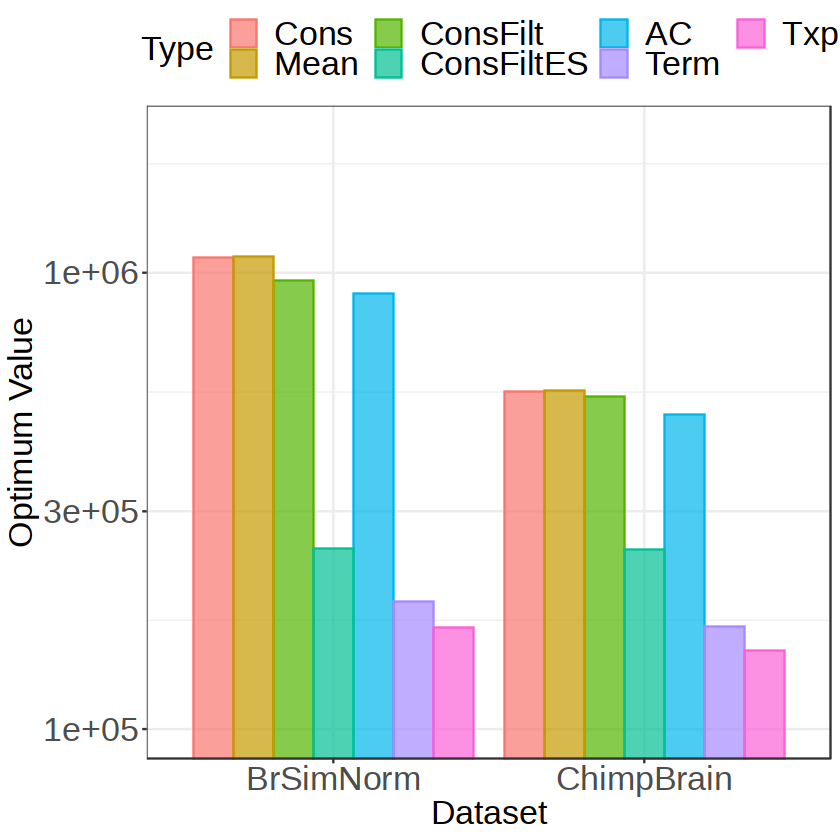

In [14]:
pLFC